In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler


In [3]:
df = pd.read_csv('twm_customer.csv', sep = ';')

In [4]:
df.head()

,cust_id,income,age,years_with_bank,nbr_children,gender,marital_status,name_prefix,first_name,last_name,street_nbr,street_name,postal_code,city_name,state_code
0,1362691,26150,46,5,1,M,2,,Donald ...,Marek ...,8298,Second ...,89194,Las Vegas,NV
1,1362487,6605,71,1,0,M,2,,ChingDyi ...,Moussavi ...,10603,Daffodil ...,90159,Los Angeles,CA
2,1363160,18548,38,8,0,F,1,,Rosa ...,Johnston ...,8817,Figueroa ...,90024,Los Angeles,CA
3,1362752,47668,54,3,0,F,1,,Lisa ...,Martin ...,676,Humble ...,90172,Los Angeles,CA
4,1362548,44554,59,9,2,F,4,,Barbara ...,O'Malley ...,6578,C ...,10138,New York City,NY


In [5]:
df_test = df[['income', 'age', 'gender', 'marital_status', 'nbr_children']]

In [11]:
df_test

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4,gender_F,gender_M
0,26150,46,1,0,1,0,0,0,1
1,6605,71,0,0,1,0,0,0,1
2,18548,38,0,1,0,0,0,1,0
3,47668,54,0,1,0,0,0,1,0
4,44554,59,2,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...
742,14795,36,1,0,0,0,1,1,0
743,26387,56,1,0,1,0,0,0,1
744,61300,50,2,0,1,0,0,0,1
745,15100,37,0,0,1,0,0,1,0


In [7]:
df_test = pd.get_dummies(df_test, prefix='marital_status', columns=['marital_status'])

In [8]:
df_test = pd.get_dummies(df_test, prefix='gender', columns=['gender'])

In [9]:
scaler = StandardScaler()
df_scaled = pd.DataFrame(scaler.fit_transform(df_test), columns=df_test.columns)

In [12]:
df_scaled

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4,gender_F,gender_M
0,0.154185,0.184312,0.258591,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,1.127172
1,-0.726524,1.493070,-0.648298,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,1.127172
2,-0.188366,-0.234490,-0.648298,1.306339,-0.946541,-0.262049,-0.321555,0.887176,-0.887176
3,1.123798,0.603115,-0.648298,1.306339,-0.946541,-0.262049,-0.321555,0.887176,-0.887176
4,0.983479,0.864867,1.165479,-0.765498,-0.946541,-0.262049,3.109892,0.887176,-0.887176
...,...,...,...,...,...,...,...,...,...
742,-0.357478,-0.339191,0.258591,-0.765498,-0.946541,-0.262049,3.109892,0.887176,-0.887176
743,0.164864,0.707816,0.258591,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,1.127172
744,1.738064,0.393714,1.165479,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,1.127172
745,-0.343735,-0.286841,-0.648298,-0.765498,1.056479,-0.262049,-0.321555,0.887176,-0.887176


In [13]:
from sklearn.decomposition import PCA

In [28]:
def apply_pca(df, components):
    columns = []
    for i in range(components):
        columns.append(f'column {i + 1}')
    pca = PCA(n_components=components)
    result = pca.fit_transform(df)
    pca_df = pd.DataFrame(data = result, columns=columns)
    return pca_df

In [84]:
test = apply_pca(df_scaled, 6)

In [85]:
test

,column 1,column 2,column 3,column 4,column 5,column 6
0,1.507416,1.231758,-0.677243,-0.129878,-0.421286,-0.256153
1,1.381409,1.137768,-1.548498,-0.159812,0.905297,-1.056067
2,-1.937546,-0.695178,-0.114601,0.198510,0.304272,0.601274
3,-1.173290,-0.747190,-0.004667,0.610169,0.982816,1.664350
4,0.988377,-1.586454,2.562768,-1.868153,1.363500,0.647892
...,...,...,...,...,...,...
742,-0.238326,-1.380487,2.161845,-2.183248,0.950549,-0.398334
743,1.707509,1.165739,-0.794841,-0.093750,-0.066141,-0.276972
744,2.444203,1.162123,0.007699,0.188492,-0.660691,1.052457
745,0.096141,-1.335759,-1.090373,-0.102222,-0.285718,-0.217592


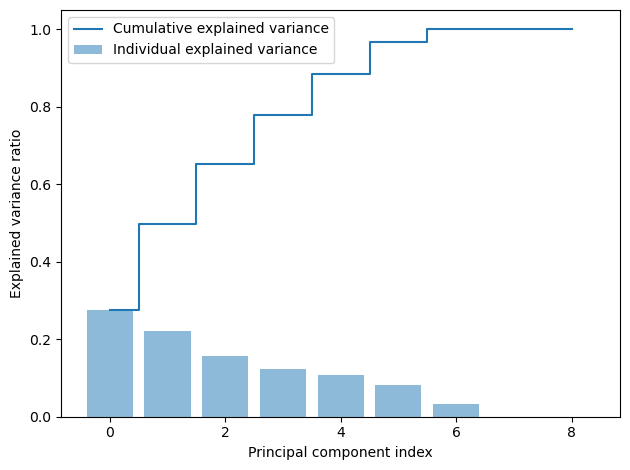

In [62]:
#scree plot
pca = PCA()
#
# Determine transformed features
#
data_pca = pca.fit_transform(df_scaled)
#
# Determine explained variance using explained_variance_ration_ attribute
#
exp_var_pca = pca.explained_variance_ratio_
#
# Cumulative sum of eigenvalues; This will be used to create step plot
# for visualizing the variance explained by each principal component.
#
cum_sum_eigenvalues = np.cumsum(exp_var_pca)
#
# Create the visualization plot
#
plt.bar(range(0,len(exp_var_pca)), exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(0,len(cum_sum_eigenvalues)), cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [86]:
km = KMeans(n_clusters=4,
           n_init=100)

y_km = km.fit_predict(test)

ac = AgglomerativeClustering(affinity = 'euclidean', linkage='ward', n_clusters = 4)

y_ac = ac.fit_predict(test)

db = DBSCAN(eps=0.1, min_samples=10, metric='euclidean')

y_db = db.fit_predict(test)

C:\Users\phini\anaconda3\envs\LHL_env\lib\site-packages\sklearn\cluster\_kmeans.py:1334: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


In [92]:
df_scaled['cluster'] = y_km

In [96]:
df_test['cluster'] = y_km

In [97]:
df_test[df_test['cluster']==0].describe()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4,gender_F,gender_M,cluster
count,353.000000,353.000000,353.000000,353.0,353.0,353.0,353.0,353.000000,353.000000,353.0
mean,26587.439093,50.796034,1.014164,0.0,1.0,0.0,0.0,0.535411,0.464589,0.0
std,21137.340173,16.091475,1.136843,0.0,0.0,0.0,0.0,0.499452,0.499452,0.0
min,1039.000000,21.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0
25%,11375.000000,37.000000,0.000000,0.0,1.0,0.0,0.0,0.000000,0.000000,0.0
50%,21384.000000,52.000000,1.000000,0.0,1.0,0.0,0.0,1.000000,0.000000,0.0
75%,36259.000000,61.000000,2.000000,0.0,1.0,0.0,0.0,1.000000,1.000000,0.0
max,144157.000000,89.000000,5.000000,0.0,1.0,0.0,0.0,1.000000,1.000000,0.0


In [98]:
df_test[df_test['cluster']==1].describe()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4,gender_F,gender_M,cluster
count,276.000000,276.000000,276.0,276.0,276.0,276.0,276.0,276.000000,276.000000,276.0
mean,14167.228261,29.927536,0.0,1.0,0.0,0.0,0.0,0.576087,0.423913,1.0
std,18417.884618,17.284838,0.0,0.0,0.0,0.0,0.0,0.495075,0.495075,0.0
min,0.000000,13.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.0
25%,0.000000,16.000000,0.0,1.0,0.0,0.0,0.0,0.000000,0.000000,1.0
50%,7622.000000,19.000000,0.0,1.0,0.0,0.0,0.0,1.000000,0.000000,1.0
75%,21743.000000,42.250000,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.0
max,111004.000000,84.000000,0.0,1.0,0.0,0.0,0.0,1.000000,1.000000,1.0


In [99]:
df_test[df_test['cluster']==2].describe()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4,gender_F,gender_M,cluster
count,48.0000,48.000000,48.000000,48.0,48.0,48.0,48.0,48.000000,48.000000,48.0
mean,37468.5000,46.416667,1.354167,0.0,0.0,1.0,0.0,0.625000,0.375000,2.0
std,32309.6858,14.974920,1.263052,0.0,0.0,0.0,0.0,0.489246,0.489246,0.0
min,3303.0000,23.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,2.0
25%,16327.0000,33.000000,0.000000,0.0,0.0,1.0,0.0,0.000000,0.000000,2.0
50%,27910.5000,46.000000,1.000000,0.0,0.0,1.0,0.0,1.000000,0.000000,2.0
75%,45899.7500,56.000000,2.000000,0.0,0.0,1.0,0.0,1.000000,1.000000,2.0
max,142274.0000,78.000000,5.000000,0.0,0.0,1.0,0.0,1.000000,1.000000,2.0


In [100]:
df_test[df_test['cluster']==3].describe()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4,gender_F,gender_M,cluster
count,70.000000,70.000000,70.000000,70.0,70.0,70.0,70.0,70.000000,70.000000,70.0
mean,26914.528571,47.328571,1.585714,0.0,0.0,0.0,1.0,0.571429,0.428571,3.0
std,21243.254798,16.346538,1.388283,0.0,0.0,0.0,0.0,0.498445,0.498445,0.0
min,2772.000000,22.000000,0.000000,0.0,0.0,0.0,1.0,0.000000,0.000000,3.0
25%,11999.000000,35.000000,0.250000,0.0,0.0,0.0,1.0,0.000000,0.000000,3.0
50%,19587.000000,42.500000,1.000000,0.0,0.0,0.0,1.0,1.000000,0.000000,3.0
75%,36611.750000,58.000000,2.000000,0.0,0.0,0.0,1.0,1.000000,1.000000,3.0
max,90248.000000,88.000000,5.000000,0.0,0.0,0.0,1.0,1.000000,1.000000,3.0


In [95]:
df_scaled[df_scaled['cluster']==0].describe()

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4,gender_F,gender_M,cluster
count,353.000000,353.000000,353.000000,3.530000e+02,3.530000e+02,3.530000e+02,3.530000e+02,353.000000,353.000000,353.0
mean,0.173896,0.435386,0.271436,-7.654980e-01,1.056479e+00,-2.620487e-01,-3.215546e-01,-0.048668,0.048668,0.0
std,0.952461,0.842394,1.030990,2.445958e-15,4.002476e-15,8.894391e-16,1.389749e-15,1.006071,1.006071,0.0
min,-0.977331,-1.124446,-0.648298,-7.654980e-01,1.056479e+00,-2.620487e-01,-3.215546e-01,-1.127172,-0.887176,0.0
25%,-0.511585,-0.286841,-0.648298,-7.654980e-01,1.056479e+00,-2.620487e-01,-3.215546e-01,-1.127172,-0.887176,0.0
50%,-0.060574,0.498414,0.258591,-7.654980e-01,1.056479e+00,-2.620487e-01,-3.215546e-01,0.887176,-0.887176,0.0
75%,0.609702,0.969567,1.165479,-7.654980e-01,1.056479e+00,-2.620487e-01,-3.215546e-01,0.887176,1.127172,0.0
max,5.471647,2.435376,3.886146,-7.654980e-01,1.056479e+00,-2.620487e-01,-3.215546e-01,0.887176,1.127172,0.0


In [101]:
import plotly.express as px

In [122]:
n_scaler = MinMaxScaler()
df_normal = pd.DataFrame(n_scaler.fit_transform(df_test), columns=df_test.columns)

In [127]:
df_normal['cluster'] = y_km

In [134]:
df_normal_zero = df_normal[df_normal['cluster']==0].drop('cluster', axis=1)
df_normal_one = df_normal[df_normal['cluster']==1].drop('cluster', axis=1)
df_normal_two = df_normal[df_normal['cluster']==2].drop('cluster', axis=1)
df_normal_three = df_normal[df_normal['cluster']==3].drop('cluster', axis=1)

In [130]:
df_normal_zero

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4,gender_F,gender_M
0,0.181399,0.434211,0.2,0.0,1.0,0.0,0.0,0.0,1.0
1,0.045818,0.763158,0.0,0.0,1.0,0.0,0.0,0.0,1.0
5,0.108798,0.526316,0.4,0.0,1.0,0.0,0.0,1.0,0.0
7,0.013381,0.868421,0.0,0.0,1.0,0.0,0.0,1.0,0.0
9,0.066747,0.434211,0.2,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...
738,0.092045,0.486842,0.2,0.0,1.0,0.0,0.0,0.0,1.0
740,0.015879,0.276316,0.0,0.0,1.0,0.0,0.0,1.0,0.0
743,0.183043,0.565789,0.2,0.0,1.0,0.0,0.0,0.0,1.0
744,0.425231,0.486842,0.4,0.0,1.0,0.0,0.0,0.0,1.0


In [114]:
df_clus0 = df_scaled[df_scaled['cluster']==0]
df_clus0.drop('cluster', inplace = True, axis=1)

C:\Users\phini\AppData\Local\Temp\ipykernel_12460\843122350.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [116]:
df_clus0

,income,age,nbr_children,marital_status_1,marital_status_2,marital_status_3,marital_status_4,gender_F,gender_M
0,0.154185,0.184312,0.258591,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,1.127172
1,-0.726524,1.493070,-0.648298,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,1.127172
5,-0.317419,0.550765,1.165479,-0.765498,1.056479,-0.262049,-0.321555,0.887176,-0.887176
7,-0.937227,1.911873,-0.648298,-0.765498,1.056479,-0.262049,-0.321555,0.887176,-0.887176
9,-0.590576,0.184312,0.258591,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,1.127172
...,...,...,...,...,...,...,...,...,...
738,-0.426241,0.393714,0.258591,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,1.127172
740,-0.921006,-0.443891,-0.648298,-0.765498,1.056479,-0.262049,-0.321555,0.887176,-0.887176
743,0.164864,0.707816,0.258591,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,1.127172
744,1.738064,0.393714,1.165479,-0.765498,1.056479,-0.262049,-0.321555,-1.127172,1.127172


In [133]:
fig = px.line_polar(df_normal_zero, r=df_normal_zero.mean(), theta = df_normal_zero.columns, line_close=True)
fig.update_traces(fill='toself')
fig.show()

C:\Users\phini\anaconda3\envs\LHL_env\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [135]:
fig = px.line_polar(df_normal_one, r=df_normal_one.mean(), theta = df_normal_one.columns, line_close=True)
fig.update_traces(fill='toself')
fig.show()

C:\Users\phini\anaconda3\envs\LHL_env\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [136]:
fig = px.line_polar(df_normal_two, r=df_normal_two.mean(), theta = df_normal_two.columns, line_close=True)
fig.update_traces(fill='toself')
fig.show()

C:\Users\phini\anaconda3\envs\LHL_env\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [137]:
fig = px.line_polar(df_normal_three, r=df_normal_three.mean(), theta = df_normal_three.columns, line_close=True)
fig.update_traces(fill='toself')
fig.show()

C:\Users\phini\anaconda3\envs\LHL_env\lib\site-packages\plotly\express\_core.py:271: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [2]:
import plotly.graph_objects as go

In [1]:
fig = go.Figure()

fig.add_trace(go.Scatterpolar(r = df_normal_zero.mean(), theta = df_normal_zero.columns,fill='toself', name = 'cluster 0'))
fig.add_trace(go.Scatterpolar(r = df_normal_one.mean(), theta = df_normal_zero.columns, fill='toself', name = 'cluster 1'))
fig.add_trace(go.Scatterpolar(r = df_normal_two.mean(), theta = df_normal_zero.columns, fill='toself', name = 'cluster 2'))
fig.add_trace(go.Scatterpolar(r = df_normal_three.mean(), theta = df_normal_zero.columns, fill='toself', name = 'cluster 3'))

fig.update_layout(title = 'Radar Plot', showlegend=True)

fig.show()

NameError: name 'go' is not defined

In [87]:
#create plotting function (take it from compass)
def plot_clusters(X,y_res, plt_cluster_centers = False):
    X_centroids = []
    Y_centroids = []

    for cluster in set(y_res):
        x = X[y_res == cluster,0]
        y = X[y_res == cluster,1]
        X_centroids.append(np.mean(x))
        Y_centroids.append(np.mean(y))

        plt.scatter(x,
                    y,
                    s=50,
                    marker='s',
                    label=f'cluster {cluster}')

    if plt_cluster_centers:
        plt.scatter(X_centroids,
                    Y_centroids,
                    marker='*',
                    c='red',
                    s=250,
                    label='centroids')
    plt.legend()
    plt.grid()
    plt.show()

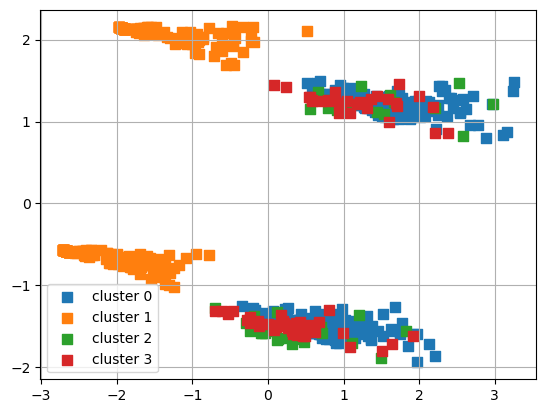

In [149]:
plot_clusters(np.array(test), y_km)

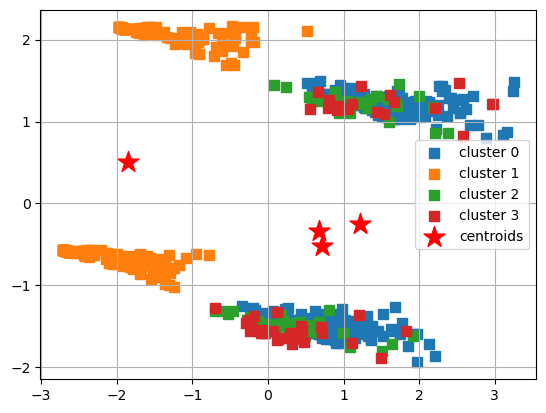

In [75]:
plot_clusters(np.array(test), y_ac, plt_cluster_centers=True)

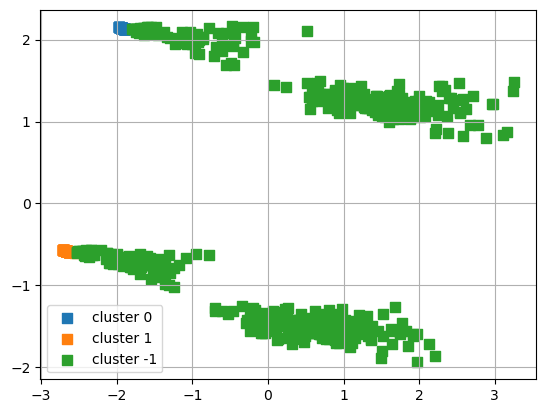

In [76]:
plot_clusters(np.array(test), y_db)

In [7]:
df2 = pd.read_csv('twm_accounts.csv', sep = ';')

In [16]:
len(df2)

1409

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1409 entries, 0 to 1408
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acct_nbr          1409 non-null   int64  
 1   cust_id           1409 non-null   int64  
 2   acct_type         1409 non-null   object 
 3   account_active    1409 non-null   object 
 4   acct_start_date   1409 non-null   object 
 5   acct_end_date     143 non-null    object 
 6   starting_balance  1409 non-null   float64
 7   ending_balance    1409 non-null   float64
dtypes: float64(2), int64(2), object(4)
memory usage: 88.2+ KB


In [17]:
df3 = pd.read_csv('twm_savings_acct.csv', sep = ';')

In [21]:
len(df3)

421

In [20]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421 entries, 0 to 420
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   cust_id           421 non-null    int64  
 1   acct_nbr          421 non-null    int64  
 2   minimum_balance   421 non-null    int64  
 3   acct_type         421 non-null    object 
 4   account_active    421 non-null    object 
 5   acct_start_date   421 non-null    object 
 6   acct_end_date     46 non-null     object 
 7   starting_balance  421 non-null    float64
 8   ending_balance    421 non-null    float64
dtypes: float64(2), int64(3), object(4)
memory usage: 29.7+ KB
